# import libraries

In [19]:
# import standard libraires
# import third-part libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
# import local libraries

# import data

In [11]:
# import data ready from eda
data = pd.read_csv('movies_metadata_eda.csv')

In [12]:
data

,adult,budget,popularity,revenue,runtime,video,vote_average,vote_count,release_year,release_month,...,production_countries_num,North America,South America,Asia,Australia,Africa,Europe,spoken_languages_num,spoken_languages_weight,belongs_to_collection
0,0,30000000.0,21.946943,373554033.0,81.0,0,7.7,5415.0,1995,10,...,1,1,0,0,0,0,0,1,0.544100,1
1,0,65000000.0,17.015539,262797249.0,104.0,0,6.9,2413.0,1995,12,...,1,1,0,0,0,0,0,2,0.623221,0
2,0,0.0,11.712900,0.0,101.0,0,6.5,92.0,1995,12,...,1,1,0,0,0,0,0,1,0.544100,1
3,0,16000000.0,3.859495,81452156.0,127.0,0,6.1,34.0,1995,12,...,1,1,0,0,0,0,0,1,0.544100,0
4,0,60000000.0,17.924927,187436818.0,170.0,0,7.7,1886.0,1995,12,...,1,1,0,0,0,0,0,2,0.589291,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42659,0,0.0,5.683753,0.0,104.0,0,5.7,26.0,1991,5,...,4,1,0,0,0,0,1,1,0.544100,0
42660,0,0.0,0.178241,0.0,360.0,0,9.0,3.0,2011,11,...,1,0,0,1,0,0,0,0,0.000000,0
42661,0,0.0,0.903007,0.0,90.0,0,3.8,6.0,2003,8,...,1,1,0,0,0,0,0,1,0.544100,0
42662,0,0.0,0.003503,0.0,87.0,0,0.0,0.0,1917,10,...,1,0,0,0,0,0,1,0,0.000000,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42664 entries, 0 to 42663
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   adult                        42664 non-null  int64  
 1   budget                       42664 non-null  float64
 2   popularity                   42664 non-null  float64
 3   revenue                      42664 non-null  float64
 4   runtime                      42664 non-null  float64
 5   video                        42664 non-null  int64  
 6   vote_average                 42664 non-null  float64
 7   vote_count                   42664 non-null  float64
 8   release_year                 42664 non-null  int64  
 9   release_month                42664 non-null  int64  
 10  roi                          42664 non-null  float64
 11  revenue_norm_max             42664 non-null  float64
 12  year_revenue_max             42664 non-null  float64
 13  budget_norm_max 

# feature selection

In [14]:
# separate exo and indogeneous variables, We choose to predict revenue_norm_mean
# this means we need to drop all columns that contain the revenue 
data = data.drop(columns = ['revenue', 'roi', 'revenue_norm_max'])
X, y = data.drop(columns = 'revenue_norm_mean'), data[['revenue_norm_mean']]

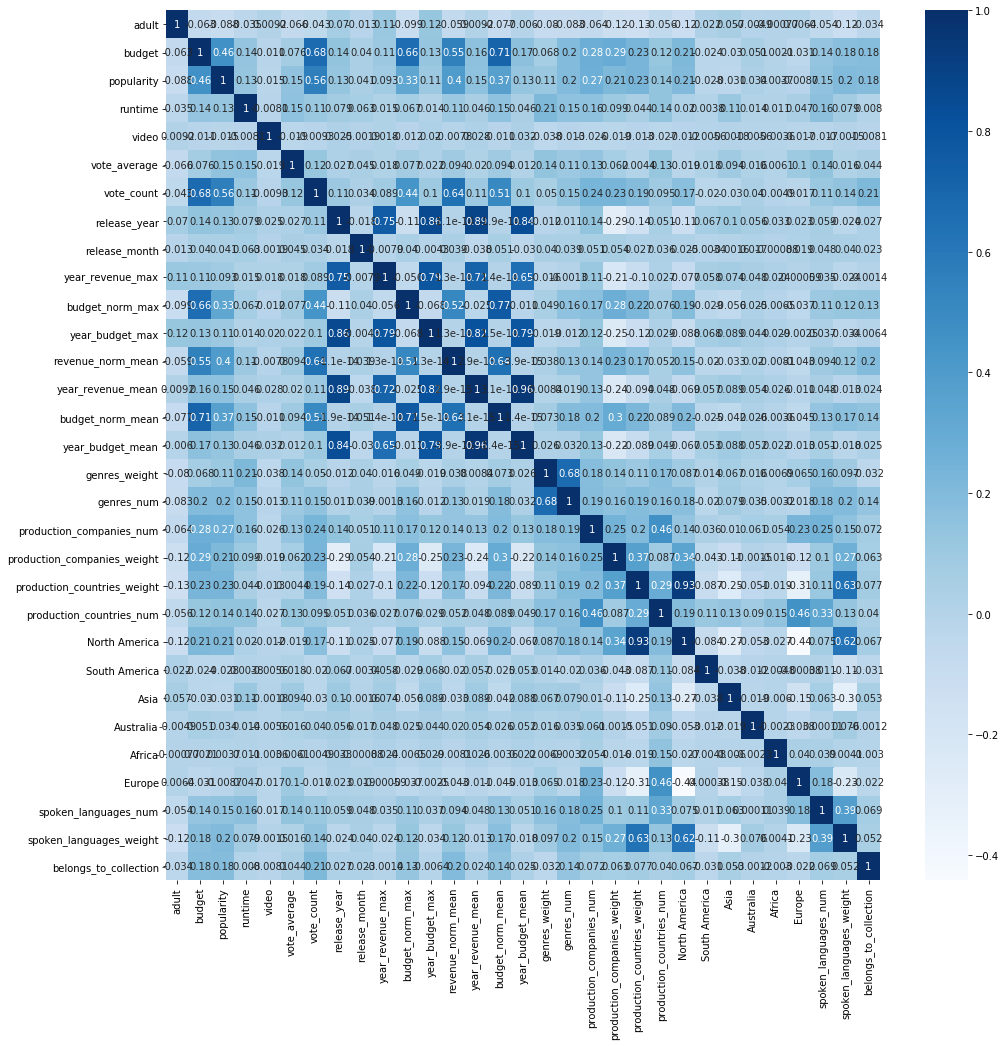

In [24]:
# since all columns are numeric, we can compute the pearsoncorrelation 
fig, ax = plt.subplots(figsize = (16, 16))
pearson = data.corr()
sns.heatmap(pearson, annot = True, cmap = plt.cm.Blues)